In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tifffile import imread
from skimage.transform import resize
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
data_path = 'data/UCMerced/'
labels_file = os.path.join(data_path, 'multilabels.txt')

image_paths = []
labels = []

with open(labels_file, 'r') as file:
    next(file)  # skip header
    for line in file:
        line = line.strip().split('\t')
        image_paths.append(os.path.join(data_path, 'images', line[0]))
        labels.append([int(label) for label in line[1:]])

# Step 2: Data Loading and Augmentation
images = []
for img_path in image_paths:
    img_path_with_extension = img_path + ".tif"  # Append ".tif" to the end of the image path
    img = imread(img_path_with_extension)
    img_resized = resize(img, (100, 100))  # Resize the image to a consistent shape
    # Add any other preprocessing steps here if needed
    images.append(img_resized)

images = np.array(images)
labels = np.array(labels)


# Step 3: Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=images[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(17, activation='sigmoid')  # 17 classes, sigmoid activation for multi-label classification
])
 

# Step 4: Training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluation 
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)



c:\Marzi\term 4\remote sensing\project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.1377 - loss: 0.4347 - val_accuracy: 0.0643 - val_loss: 0.3797
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.0595 - loss: 0.3606 - val_accuracy: 0.1190 - val_loss: 0.3418
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.1884 - loss: 0.3277 - val_accuracy: 0.2000 - val_loss: 0.3061
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2040 - loss: 0.2834 - val_accuracy: 0.2286 - val_loss: 0.3043
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.2161 - loss: 0.2605 - val_accuracy: 0.2452 - val_loss: 0.2953
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.2376 - loss: 0.2427 - val_accuracy: 0.2571 - val_loss: 0.2574
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.2467 - loss: 0.2183 - val_accuracy: 0.1810 - val_loss: 0.2678
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.2517 - loss: 0.2151 - val_accuracy: 0.2786 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for ./data2/prediction/pred1.png


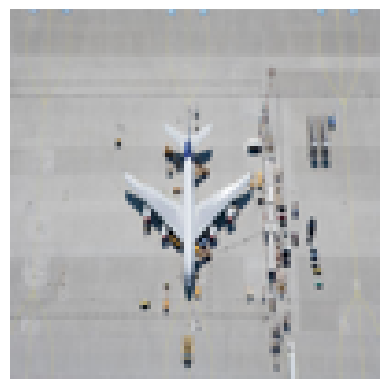

airplane :  0.98494095
buildings :  0.55080366
pavement :  0.99621254

Predictions for ./data2/prediction/pred2.png


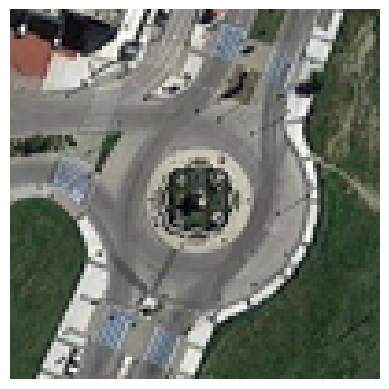

bare-soil :  0.70149535
buildings :  0.65588737
grass :  0.7246951
pavement :  0.9835504

Predictions for ./data2/prediction/pred3.png


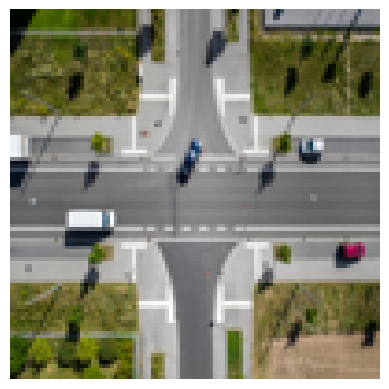

bare-soil :  0.8268993
buildings :  0.66364324
cars :  0.90024686
pavement :  0.99862635

Predictions for ./data2/prediction/pred4.png


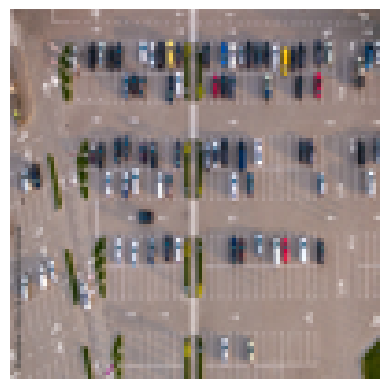

cars :  0.7752591
grass :  0.5046916
pavement :  0.99948984
trees :  0.5735766

Predictions for ./data2/prediction/pred5.png


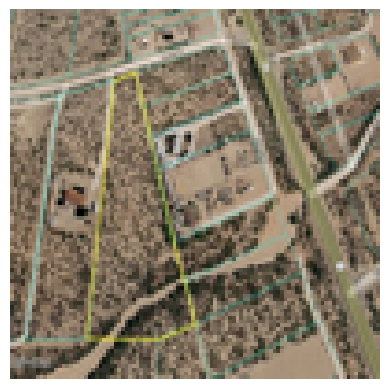

bare-soil :  0.73435545
chaparral :  0.7235114

Predictions for ./data2/prediction/pred6.png


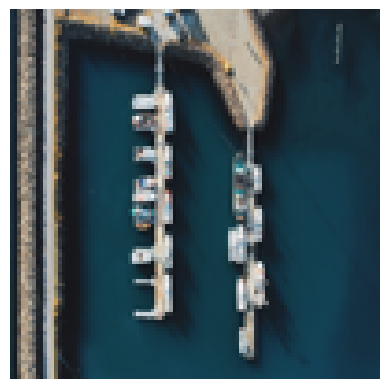

dock :  0.9183953
ship :  0.97682035
water :  0.9956424



In [45]:

# Step 6: Prediction
from PIL import Image


pred_images = []
image_paths = ['./data/prediction/pred1.png', './data/prediction/pred2.png',
               './data/prediction/pred3.png', './data/prediction/pred4.png',
               './data/prediction/pred5.png', './data/prediction/pred6.png']


for img_path in image_paths:
    img = Image.open(img_path)
    img = img.convert('RGB')  # Ensure that the image is in RGB mode
    img_resized = img.resize((100, 100))  # Resize the image to match the input size of the model
    img_array = np.array(img_resized) / 255.0  # Normalize pixel values to the range [0, 1]
    pred_images.append(img_array)

pred_images = np.array(pred_images)

# Perform prediction
predictions = model.predict(pred_images)

# Display the predictions
for i, img_path in enumerate(image_paths):
    print("Predictions for", img_path)
    plt.imshow(pred_images[i])
    plt.axis('off')
    plt.show()
    for j, label in enumerate(['airplane', 'bare-soil', 'buildings', 'cars', 'chaparral', 'court', 'dock', 'field', 'grass', 'mobile-home', 'pavement', 'sand', 'sea', 'ship', 'tanks', 'trees', 'water']):
        if predictions[i][j] > 0.5:
            print(label, ": ", predictions[i][j])
    print()